# Resistividade x Resistência

$R = \frac{\rho A}{L}$

$R = \alpha L$

- Onde $\alpha = \rho/A$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import linregress
from scipy.optimize import curve_fit
from uncertainties import ufloat
%matplotlib inline

In [3]:
df = pd.read_csv('dados.csv')

In [4]:
df.head()

,R(ohm),X(m)
0,0.89,0.11
1,1.01,0.16
2,1.10,0.21
3,1.19,0.26
4,1.31,0.31


In [5]:
df[r'$\Delta R$'] = ((df['R(ohm)'] * 0.02) +0.05).round(5)
df[r'$\Delta X$'] = 0.0005

In [6]:
df.head()

,R(ohm),X(m),$\Delta R$,$\Delta X$
0,0.89,0.11,0.0678,0.0005
1,1.01,0.16,0.0702,0.0005
2,1.10,0.21,0.0720,0.0005
3,1.19,0.26,0.0738,0.0005
4,1.31,0.31,0.0762,0.0005


In [7]:
# Transformando para centímetros
df['X(m)'] = df['X(m)'] * 100

In [8]:
# Estimando a incerteza do coeficiente angular pela media
df['$\\Delta R$'].mean().round(5)

0.08485

In [9]:
# Estimando a incerteza pela media ponderada
media_pond = 0
for i in range(len(df['R(ohm)'])):
    media_pond = media_pond + df['R(ohm)'][i] * df['$\\Delta R$'][i]
media_pond = media_pond/((df['R(ohm)']).sum())
print(media_pond.round(5))

0.08788


Text(0.5, 0, 'Comprimento (m)')

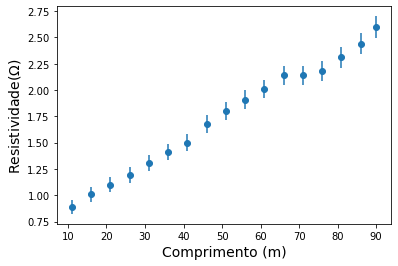

In [10]:
# Plotando os pontos com as incertezas
plt.scatter(df['X(m)'], df['R(ohm)'])
plt.errorbar(df['X(m)'], df['R(ohm)'], yerr=df['$\\Delta R$'],fmt='none')
plt.ylabel(r'Resistividade($\Omega$)', fontsize=14)
plt.xlabel('Comprimento (m)', fontsize=14)

- O sistema pode ser descrito através de uma reta da forma:
    $R = \alpha x + B$

Text(0.5, 0, 'Comprimento (cm)')

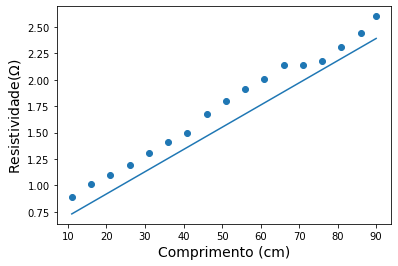

In [11]:
# Definindo a reta
def func(x,alpha,b):
    return alpha * x + b   

# Estimando valores para a reta
y_chute = func(df['X(m)'], 0.021, b=0.5)
plt.plot(df['X(m)'], y_chute)
plt.scatter(df['X(m)'], df['R(ohm)'])
plt.ylabel(r'Resistividade($\Omega$)', fontsize=14)
plt.xlabel('Comprimento (cm)', fontsize=14)

### Fazendo o fit da curva:

Text(0.5, 0, 'Comprimento (cm)')

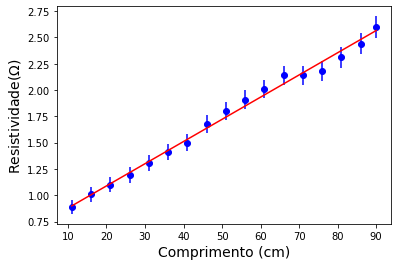

In [16]:
# Fazendo o curve fit
alpha, pcov = curve_fit(func, df['X(m)'],df['R(ohm)'],sigma=df['$\\Delta R$'])
y_fit = func(df['X(m)'], *alpha)

# Plotando
plt.plot(df['X(m)'], y_fit, color='red')
plt.scatter(df['X(m)'], df['R(ohm)'], color='blue')
plt.errorbar(df['X(m)'], df['R(ohm)'], yerr=df['$\\Delta R$'], fmt='none', color='blue')
plt.ylabel(r'Resistividade($\Omega$)', fontsize=14)
plt.xlabel('Comprimento (cm)', fontsize=14)

In [17]:
# print(alpha.round(3))
# print(alpha[0])
# print(pcov)
alpha = alpha[0].round(5)
print('Coeficiente angular = ', alpha)

Coeficiente angular =  0.0211


In [18]:
# Calculo da áread e Resistividade com incerteza
diametro = ufloat(0.0510,0.0005) 
r = diametro/2
alpha = ufloat(alpha, 0.08788) # alpha
A = np.pi * (r**2) # (centimetro quadrados)
print('Area =', A,' cm^2')
res = (alpha) *  A
print('Resistividade = ',res, '(Ohm . cm)')

Area = 0.00204+/-0.00004  cm^2
Resistividade =  0.00004+/-0.00018 (Ohm . cm)
